<a href="https://colab.research.google.com/github/TheodorosChristou/COM616_AE2_TheodorosChristou/blob/main/CNN_Architecture_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_40 (Ba  (None, 30, 30, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_40 (Dropout)        (None, 15, 15, 64)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 batch_normalization_41 (Ba  (None, 13, 13, 128)      

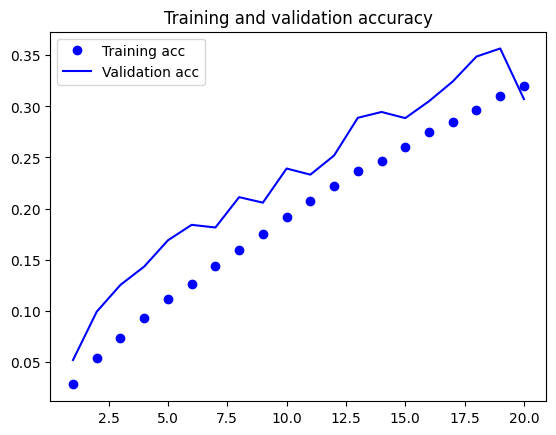

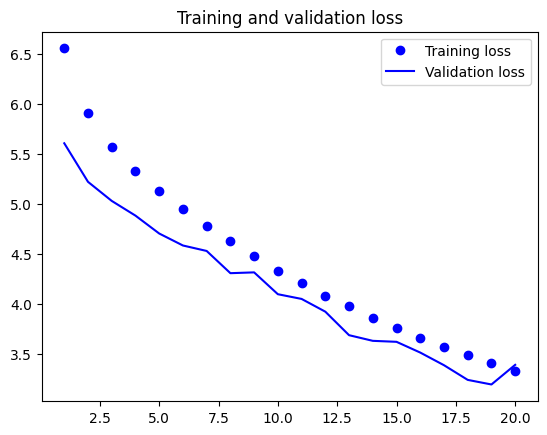

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.87234   0.41000   0.55782       100
          dolphin    0.51471   0.35000   0.41667       100
            otter    0.32000   0.24000   0.27429       100
             seal    0.30909   0.17000   0.21935       100
            whale    0.12403   0.16000   0.13974       100
         aquarium    0.38889   0.21000   0.27273       100
             fish    0.27820   0.37000   0.31760       100
              ray    0.34615   0.36000   0.35294       100
            shark    0.22358   0.55000   0.31792       100
            trout    0.79310   0.23000   0.35659       100
          orchids    0.23913   0.11000   0.15068       100
          poppies    0.43750   0.14000   0.21212       100
            roses    0.42373   0.25000   0.31447       100
       sunflowers    0.45000   0.18000   0.25714       100
           tulips    0.28205   0.11000   0.15827     

In [ ]:
def CNN():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    return model

CNN = CNN()


from tensorflow.keras import optimizers
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
CNN.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

CNN.summary()

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = CNN.fit(X_train, y_train, epochs=20, batch_size=64,
                                  validation_data=(X_validation, y_validation))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(CNN)
        scores = CNN.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {CNN.metrics_names[1]} of {scores[1]*100}')
        return CNN

CNN = gpu()